In [ ]:
!pip install catboost
# Dataframe

import pandas as pd

# Array
import numpy as np
import itertools

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime

# text preprocessing
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import gensim
import re


import unicodedata
tokenizer = ToktokTokenizer()
nlp = spacy.load('en', parse=True, tag=True, entity=True)

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [ ]:
df3 = pd.read_csv('datasets/Reduced_Cleaned_Reviews_headphones.csv')

In [ ]:
df3.head(3)

,Rating,verified,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,also_buy,...,date,price,review_text,rating_class,clean_text,year,rating_class_num,token,review_length,review_length_bin
0,5,True,A38RQFVQ1AKJQQ,4126895493,George Walker,1424563200,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,NaN,$7.99,Five Stars Great headphones. It's just the cor...,good,five star great headphones cord short,2015,1,"['five', 'star', 'great', 'headphones', 'cord'...",14,"(0, 100]"
1,5,True,A299MRB9O6GWDE,4126895493,Carolyn B,1494201600,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,NaN,$7.99,Officewear Really like these headphone. Wante...,good,officewear really like headphone want somethin...,2017,1,"['officewear', 'really', 'like', 'headphone', ...",47,"(0, 100]"
2,1,True,A3ACFC6DQQLIQT,4126895493,MK,1478304000,"['Electronics', 'Headphones', 'Over-Ear Headph...",['Brand new and High quality! Enjoy your favor...,HeadGear 3.5mm Foldable Headphone Headset for ...,"['B00W87LKXE', 'B019PO1ZRI', 'B019PO1ZMI', 'B0...",...,NaN,$7.99,For the money they are fine. Just hope they ho...,bad,money fine hope hold wire headphone break less...,2016,0,"['money', 'fine', 'hope', 'hold', 'wire', 'hea...",29,"(0, 100]"


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rating             15000 non-null  int64 
 1   verified           15000 non-null  bool  
 2   reviewerID         15000 non-null  object
 3   asin               15000 non-null  object
 4   reviewerName       14999 non-null  object
 5   unixReviewTime     15000 non-null  int64 
 6   category           15000 non-null  object
 7   description        15000 non-null  object
 8   title              15000 non-null  object
 9   also_buy           15000 non-null  object
 10  brand              15000 non-null  object
 11  feature            15000 non-null  object
 12  rank               15000 non-null  object
 13  also_view          15000 non-null  object
 14  main_cat           15000 non-null  object
 15  similar_item       13899 non-null  object
 16  date               14130 non-null  objec

In [ ]:
df4 = df3.drop(['Rating','reviewerName','unixReviewTime','verified','description','category','title','price','also_view','brand','rating_class_num','review_length','review_length_bin','main_cat','price','feature','rank','date','similar_item'], axis=1)


In [ ]:
df4=df4.dropna()

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14997 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviewerID    14997 non-null  object
 1   asin          14997 non-null  object
 2   also_buy      14997 non-null  object
 3   review_text   14997 non-null  object
 4   rating_class  14997 non-null  object
 5   clean_text    14997 non-null  object
 6   year          14997 non-null  int64 
 7   token         14997 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.0+ MB


In [ ]:
df4['rating_class'] = df4['rating_class'].apply(lambda x: 0 if x == 'bad' else 1)

In [ ]:
X = df4['clean_text']
y = df4['rating_class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(11247,)
Test Set Shape		:(3750,)


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [ ]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Bad','Good'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

In [ ]:
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

In [ ]:
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 11138


In [ ]:
vocab = count_vect.get_feature_names()

In [ ]:
pd.DataFrame(count_vect_train, columns = vocab).head()

,_in,aa,aaa,aaas,aaasize,aac,aany,aas,aats,ab,...,zmmicheadphone,zombies,zone,zoom,zotac,zune,zunes,zx,zxr,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

def modeling(Model, Xtrain = count_vect_train, Xtest = count_vect_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

In [ ]:
#Dummy Classifier
clf = DummyClassifier(strategy = 'stratified', random_state =42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred, average = 'weighted')
    
# Printing evaluation metric (f1-score) 
print("f1 score: {}".format(score))

f1 score: 0.785233365362171


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.13      0.13      0.13       462
           1       0.88      0.88      0.88      3288

    accuracy                           0.79      3750
   macro avg       0.50      0.50      0.50      3750
weighted avg       0.79      0.79      0.79      3750



### 1) Logistic Regression with CountVectorizer


In [ ]:
# Call the modeling function for logistic regression with countvectorizer and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                                     class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_logreg = y_pred

f1 score: 0.9124946244648188


In [ ]:
print(classification_report(y_test, y_pred_cv_logreg))

              precision    recall  f1-score   support

           0       0.59      0.79      0.68       462
           1       0.97      0.92      0.95      3288

    accuracy                           0.91      3750
   macro avg       0.78      0.86      0.81      3750
weighted avg       0.92      0.91      0.91      3750



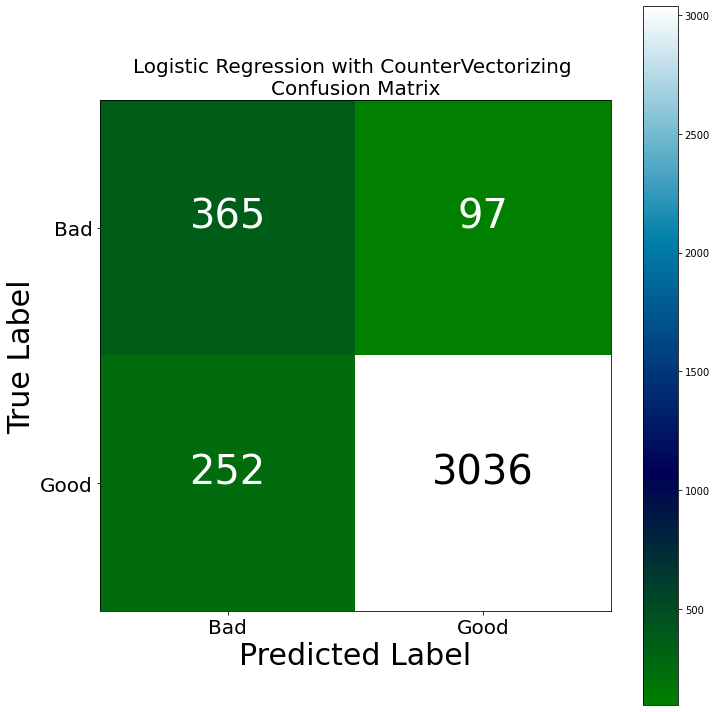

In [ ]:
disp_confusion_matrix(y_pred_cv_logreg, "Logistic Regression")

### 2)  Random Forest with CountVectorizer

In [ ]:
# Call the modeling function for random forest classifier with countvectorizer and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_rf = y_pred

f1 score: 0.8986150087260034


In [ ]:
print(classification_report(y_test, y_pred_cv_rf))

              precision    recall  f1-score   support

           0       0.96      0.34      0.50       462
           1       0.91      1.00      0.95      3288

    accuracy                           0.92      3750
   macro avg       0.94      0.67      0.73      3750
weighted avg       0.92      0.92      0.90      3750



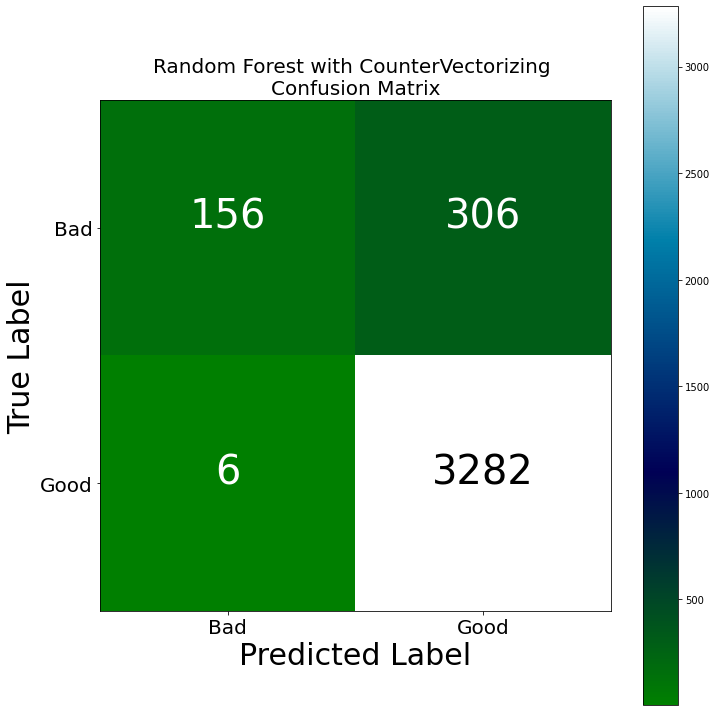

In [ ]:
disp_confusion_matrix(y_pred_cv_rf, "Random Forest")

### 3)Naive Bayes with CountVectorizer

In [ ]:
# Call the modeling function for naive bayes with countvectorizer and print f1 score
modeling(MultinomialNB())

# Assign y_pred to a variable for further process
y_pred_cv_nb = y_pred

f1 score: 0.9126828120468949


In [ ]:
print(classification_report(y_test, y_pred_cv_nb))

              precision    recall  f1-score   support

           0       0.72      0.54      0.62       462
           1       0.94      0.97      0.95      3288

    accuracy                           0.92      3750
   macro avg       0.83      0.76      0.79      3750
weighted avg       0.91      0.92      0.91      3750



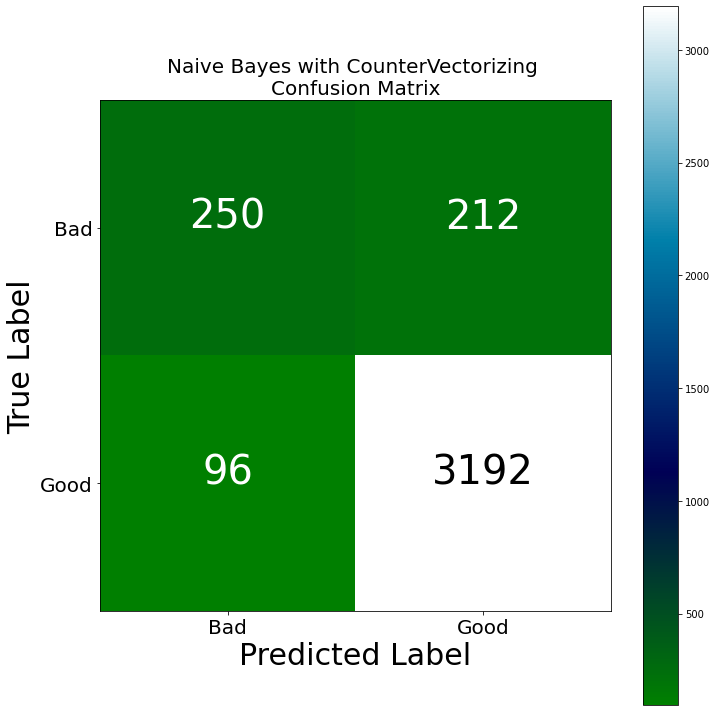

In [ ]:
disp_confusion_matrix(y_pred_cv_nb, "Naive Bayes")

### 4) XGBoost with CountVectorizer


In [ ]:
# Call the modeling function for XGBoost with countvectorizer and print f1 score
modeling(XGBClassifier())

# Assign y_pred to a variable for further process
y_pred_cv_xgb = y_pred

f1 score: 0.8932787263051415


In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_xgb))

              precision    recall  f1-score   support

           0       0.87      0.33      0.48       462
           1       0.91      0.99      0.95      3288

    accuracy                           0.91      3750
   macro avg       0.89      0.66      0.71      3750
weighted avg       0.91      0.91      0.89      3750



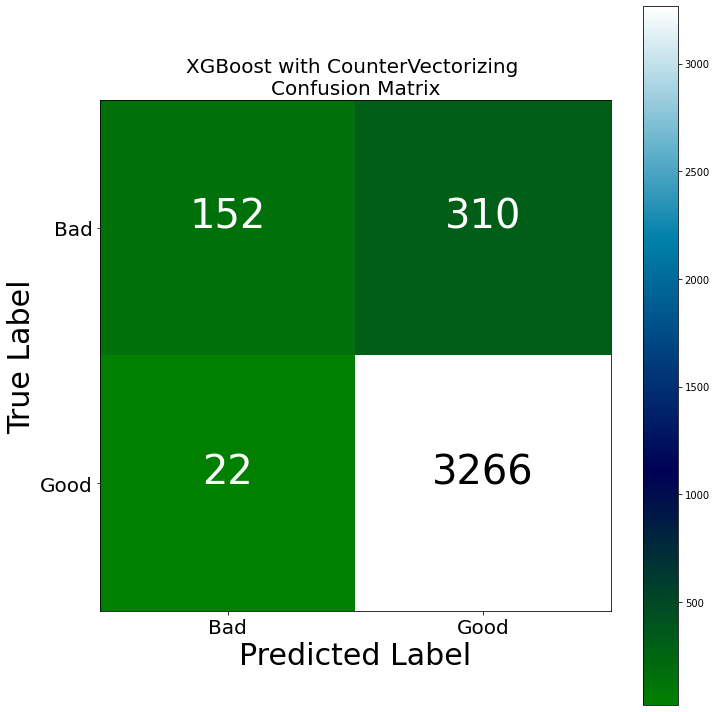

In [ ]:
# Print confusion matrix for gradient boosting with countVectorizer
disp_confusion_matrix(y_pred_cv_xgb, "XGBoost")

### 5) CatBoost with CountVectorizer


In [ ]:
# Call the modeling function for CatBoost with countvectorizer and print f1 score
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, 
                            depth=2, loss_function='Logloss'))

# Assign y_pred to a variable for further process
y_pred_cv_catboost = y_pred

0:	learn: 0.3869757	total: 63.1ms	remaining: 6.25s
1:	learn: 0.3388522	total: 77.8ms	remaining: 3.81s
2:	learn: 0.3198637	total: 91.8ms	remaining: 2.97s
3:	learn: 0.3076198	total: 105ms	remaining: 2.53s
4:	learn: 0.2906739	total: 122ms	remaining: 2.32s
5:	learn: 0.2807696	total: 136ms	remaining: 2.13s
6:	learn: 0.2740026	total: 150ms	remaining: 2s
7:	learn: 0.2664883	total: 165ms	remaining: 1.9s
8:	learn: 0.2606421	total: 179ms	remaining: 1.81s
9:	learn: 0.2549500	total: 192ms	remaining: 1.73s
10:	learn: 0.2512402	total: 206ms	remaining: 1.67s
11:	learn: 0.2407004	total: 221ms	remaining: 1.62s
12:	learn: 0.2361452	total: 237ms	remaining: 1.58s
13:	learn: 0.2332622	total: 251ms	remaining: 1.54s
14:	learn: 0.2282844	total: 269ms	remaining: 1.53s
15:	learn: 0.2247922	total: 291ms	remaining: 1.53s
16:	learn: 0.2221735	total: 305ms	remaining: 1.49s
17:	learn: 0.2193392	total: 318ms	remaining: 1.45s
18:	learn: 0.2117505	total: 332ms	remaining: 1.41s
19:	learn: 0.2066580	total: 345ms	remainin

In [ ]:
print(classification_report(y_test, y_pred_cv_catboost))

              precision    recall  f1-score   support

           0       0.80      0.52      0.63       462
           1       0.94      0.98      0.96      3288

    accuracy                           0.93      3750
   macro avg       0.87      0.75      0.80      3750
weighted avg       0.92      0.93      0.92      3750



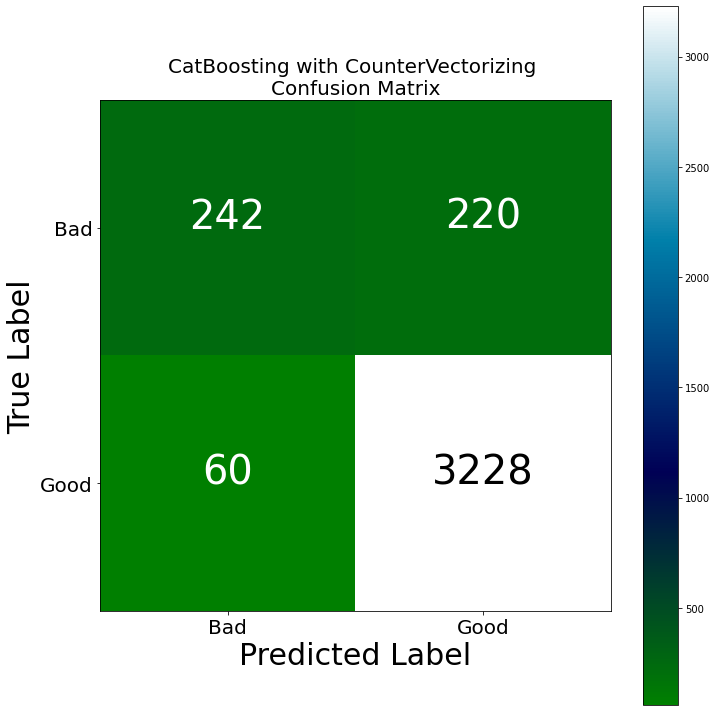

In [ ]:
# Print confusion matrix for CatBoost with countVectorizer
disp_confusion_matrix(y_pred_cv_catboost, "CatBoosting")

### 6) Comparison of Models with CountVectorizer

In [ ]:
# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['bad', 'good', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [ ]:
#For loop for using "comparison functions" 

def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    vector_tv = 'CountVect'
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label, vector_tv)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index(['vectorizer', 'model', 'accuracy', 'class'])

In [ ]:
def f1_score_bar_plot(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

In [ ]:
comparison_table(y_preds = [y_pred_cv_logreg, y_pred_cv_rf, y_pred_cv_nb, y_pred_cv_xgb, y_pred_cv_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

In [ ]:
df_tv2

precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.906933 bad       0.591572  0.790043  0.676552   
                                  good      0.969039  0.923358  0.945647   
                                  average   0.922535  0.906933  0.912495   
           Random Forest 0.916800 bad       0.962963  0.337662  0.500000   
                                  good      0.914716  0.998175  0.954625   
                                  average   0.920660  0.916800  0.898615   
           Naive Bayes   0.917867 bad       0.722543  0.541126  0.618812   
                                  good      0.937720  0.970803  0.953975   
                                  average   0.911211  0.917867  0.912683   
           XGBoost       0.911467 bad       0.873563  0.329004  0.477987   
                                  good      0.913311  0.993309  0.951632   
                                  average   0.908414  0.911467  0.893279   
           CatBoost      0.925333 bad       0.801325  0.523810  0.633508   
                                  good      0.936195  0.981752  0.958432   
                                  average   0.919579  0.925333  0.918402   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.906933 bad        462.0  
                                  good      3288.0  
                                  average   3750.0  
           Random Forest 0.916800 bad        462.0  
                                  good      3288.0  
                                  average   3750.0  
           Naive Bayes   0.917867 bad        462.0  
                                  good      3288.0  
                                  average   3750.0  
           XGBoost       0.911467 bad        462.0  
                                  good      3288.0  
                                  average   3750.0  
           CatBoost      0.925333 bad        462.0  
                                  good      3288.0  
                                  average   3750.0

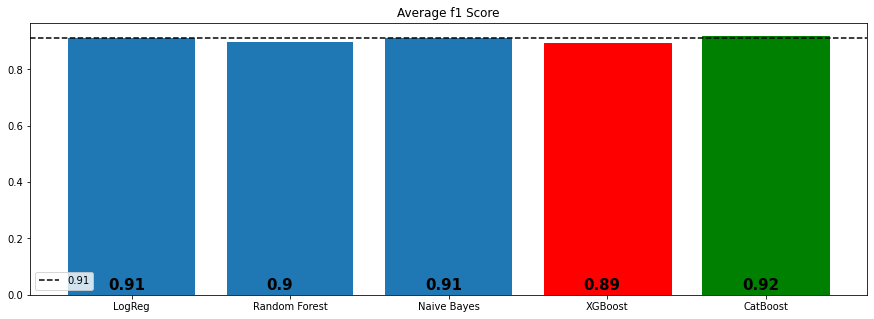

In [ ]:
f1_score_bar_plot(df=df_tv, category='average', title= "Average f1 Score")

## 4.2 TF-IDF

In order to help our model focus more on meaningful words, we can use a TF-IDF score (Term Frequency, Inverse Document Frequency) on top of our Bag of Words model. TF-IDF weighs words by how rare they are in our dataset, discounting words that are too frequent and just add to the noise.

In [ ]:
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test)
tfidf_vect_test = tfidf_vect_test.toarray()

### 4.2.1 Logistic Regression with TF-IDF

In [ ]:

# Call the modeling function for logistic regression with TF-IDF and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42), 
                            tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_logreg = y_pred

f1 score: 0.8849336652205866


In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_logreg))

              precision    recall  f1-score   support

           0       0.48      0.89      0.63       462
           1       0.98      0.87      0.92      3288

    accuracy                           0.87      3750
   macro avg       0.73      0.88      0.77      3750
weighted avg       0.92      0.87      0.88      3750



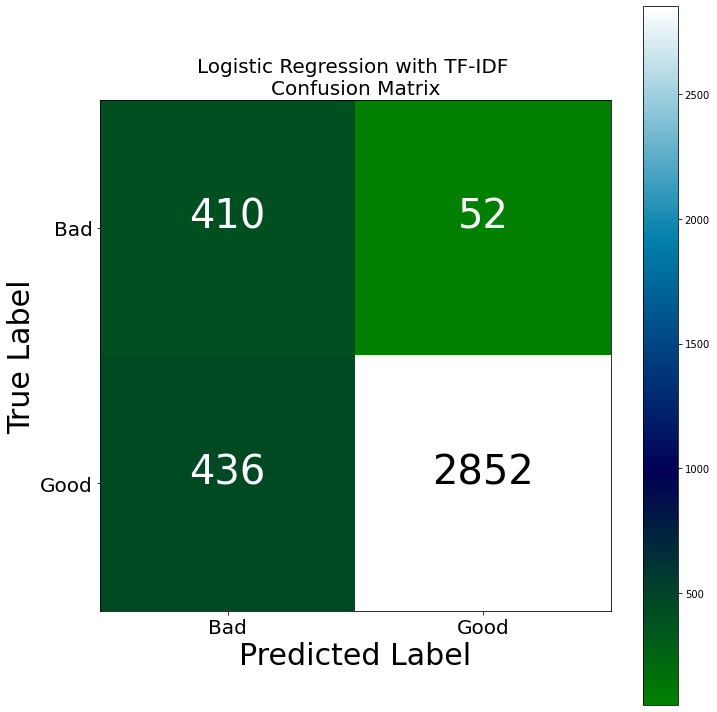

In [ ]:
# Print confusion matrix for logistic regression with TF-IDF
disp_confusion_matrix(y_pred_tfidf_logreg, "Logistic Regression", "TF-IDF")

### 4.2.2 Random Forest with TF-IDF


In [ ]:
# Call the modeling function for random forest classifier with TF-IDF and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_rf = y_pred

f1 score: 0.8867610590309241


In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_rf))

              precision    recall  f1-score   support

           0       0.95      0.28      0.43       462
           1       0.91      1.00      0.95      3288

    accuracy                           0.91      3750
   macro avg       0.93      0.64      0.69      3750
weighted avg       0.91      0.91      0.89      3750



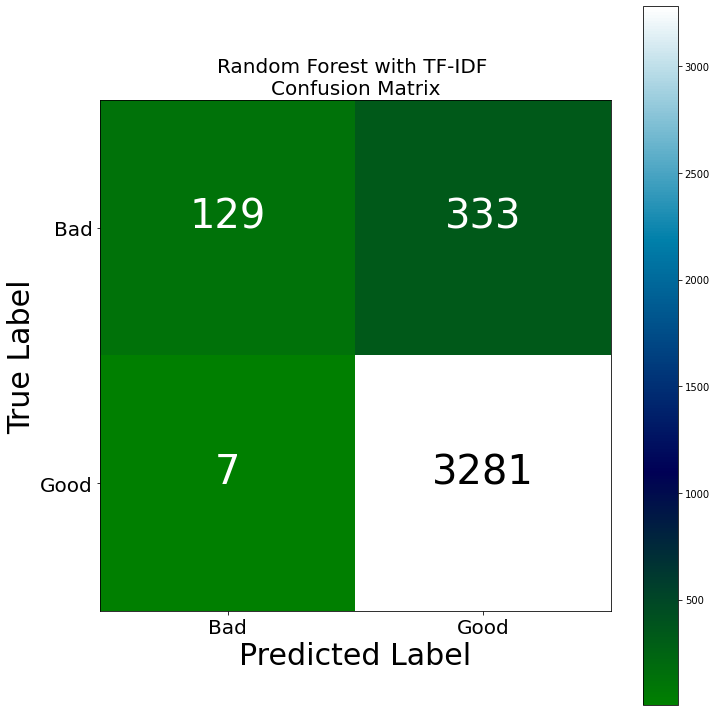

In [ ]:
# Print confusion matrix for random forest classifier with TF-IDF
disp_confusion_matrix(y_pred_tfidf_rf, "Random Forest", "TF-IDF")

### 4.2.3 Naive Bayes with TF-IDF


In [ ]:
# Call the modeling function for naive bayes with TF-IDF and print f1 score
modeling(MultinomialNB(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_nb = y_pred

f1 score: 0.8224641926969554


In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_nb))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       462
           1       0.88      1.00      0.94      3288

    accuracy                           0.88      3750
   macro avg       0.94      0.51      0.48      3750
weighted avg       0.89      0.88      0.82      3750



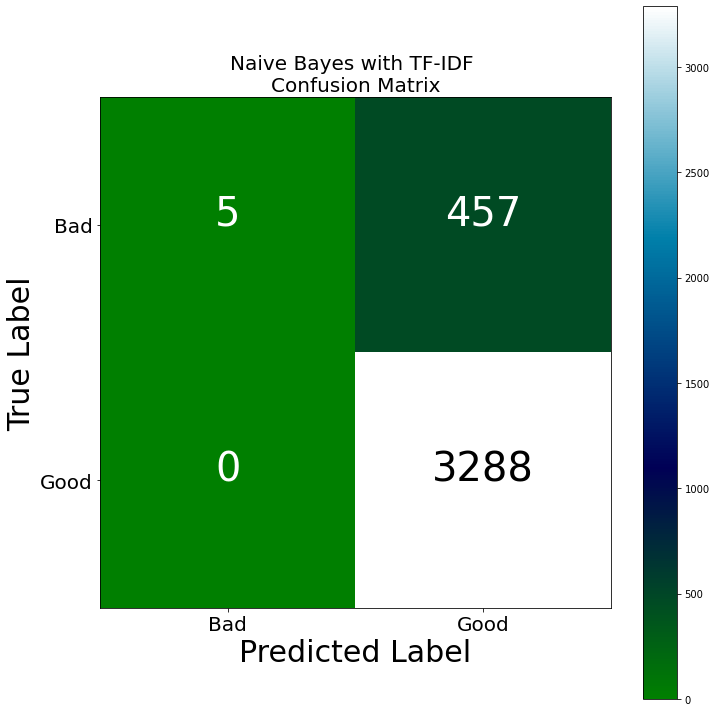

In [ ]:
# Print confusion matrix for naive bayes with TF-IDF
disp_confusion_matrix(y_pred_tfidf_nb, "Naive Bayes", "TF-IDF")

### 4.2.4 XGBoost with TF-IDF

In [ ]:
# Call the modeling function for XGBoost with TF-IDF and print f1 score
modeling(XGBClassifier(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_xgb = y_pred

f1 score: 0.9009896429118351


In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_xgb))

              precision    recall  f1-score   support

           0       0.91      0.36      0.52       462
           1       0.92      0.99      0.95      3288

    accuracy                           0.92      3750
   macro avg       0.91      0.68      0.74      3750
weighted avg       0.92      0.92      0.90      3750



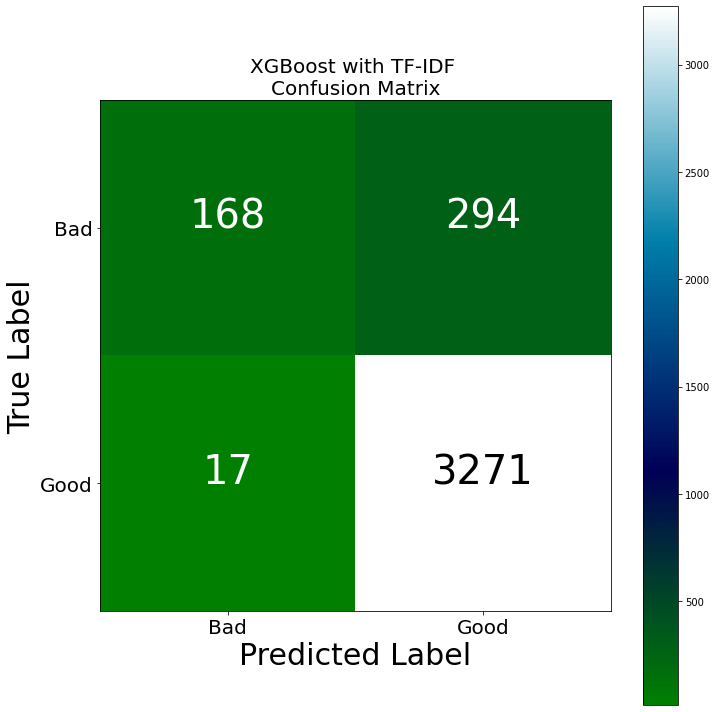

In [ ]:
# Print confusion matrix for XGBoost with TF-IDF
disp_confusion_matrix(y_pred_tfidf_xgb, "XGBoost", "TF-IDF")

### 4.2.5 Catboost with TF-IDF

In [ ]:
# Call the modeling function for Catboost with TF-IDF and print f1 score
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, depth=2, 
                            loss_function='Logloss'), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_catboost = y_pred

0:	learn: 0.3857820	total: 32.7ms	remaining: 3.24s
1:	learn: 0.3417236	total: 62.3ms	remaining: 3.05s
2:	learn: 0.3156364	total: 90.5ms	remaining: 2.93s
3:	learn: 0.2951394	total: 121ms	remaining: 2.9s
4:	learn: 0.2851263	total: 150ms	remaining: 2.85s
5:	learn: 0.2745845	total: 179ms	remaining: 2.8s
6:	learn: 0.2668228	total: 208ms	remaining: 2.76s
7:	learn: 0.2588653	total: 242ms	remaining: 2.78s
8:	learn: 0.2519385	total: 275ms	remaining: 2.78s
9:	learn: 0.2467525	total: 305ms	remaining: 2.74s
10:	learn: 0.2407504	total: 335ms	remaining: 2.71s
11:	learn: 0.2340595	total: 365ms	remaining: 2.68s
12:	learn: 0.2301745	total: 396ms	remaining: 2.65s
13:	learn: 0.2258006	total: 426ms	remaining: 2.62s
14:	learn: 0.2223091	total: 465ms	remaining: 2.63s
15:	learn: 0.2195043	total: 500ms	remaining: 2.62s
16:	learn: 0.2123959	total: 533ms	remaining: 2.6s
17:	learn: 0.2079005	total: 564ms	remaining: 2.57s
18:	learn: 0.2057696	total: 593ms	remaining: 2.53s
19:	learn: 0.2040408	total: 623ms	remaini

In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_catboost))

              precision    recall  f1-score   support

           0       0.78      0.54      0.64       462
           1       0.94      0.98      0.96      3288

    accuracy                           0.92      3750
   macro avg       0.86      0.76      0.80      3750
weighted avg       0.92      0.92      0.92      3750



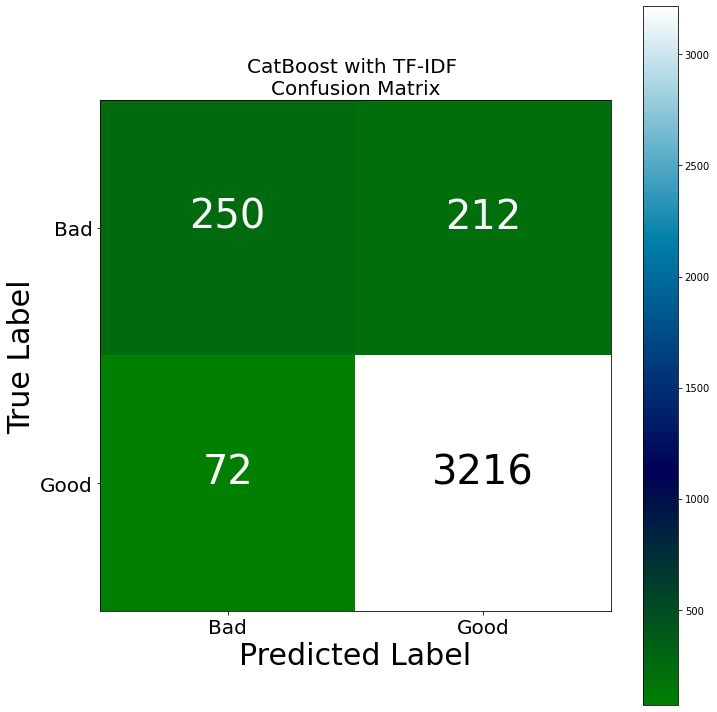

In [ ]:
disp_confusion_matrix(y_pred_tfidf_catboost, "CatBoost", "TF-IDF")

In [ ]:
comparison_table(y_preds = [y_pred_tfidf_logreg, y_pred_tfidf_rf, y_pred_tfidf_nb, y_pred_tfidf_xgb, y_pred_tfidf_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

In [ ]:
# Print the comparision matrix
print('\nComparision Matrix of Models with TF-IDF Vectorizer\n')
df_tv2


Comparision Matrix of Models with TF-IDF Vectorizer



precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.869867 bad       0.484634  0.887446  0.626911   
                                  good      0.982094  0.867397  0.921189   
                                  average   0.920807  0.869867  0.884934   
           Random Forest 0.909333 bad       0.948529  0.279221  0.431438   
                                  good      0.907858  0.997871  0.950739   
                                  average   0.912869  0.909333  0.886761   
           Naive Bayes   0.878133 bad       1.000000  0.010823  0.021413   
                                  good      0.877971  1.000000  0.935021   
                                  average   0.893005  0.878133  0.822464   
           XGBoost       0.917067 bad       0.908108  0.363636  0.519320   
                                  good      0.917532  0.994830  0.954618   
                                  average   0.916371  0.917067  0.900990   
           CatBoost      0.924267 bad       0.776398  0.541126  0.637755   
                                  good      0.938156  0.978102  0.957713   
                                  average   0.918228  0.924267  0.918294   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.869867 bad        462.0  
                                  good      3288.0  
                                  average   3750.0  
           Random Forest 0.909333 bad        462.0  
                                  good      3288.0  
                                  average   3750.0  
           Naive Bayes   0.878133 bad        462.0  
                                  good      3288.0  
                                  average   3750.0  
           XGBoost       0.917067 bad        462.0  
                                  good      3288.0  
                                  average   3750.0  
           CatBoost      0.924267 bad        462.0  
                                  good      3288.0  
                                  average   3750.0

#### Average f1 score - Models with TF-IDF Vectorizer


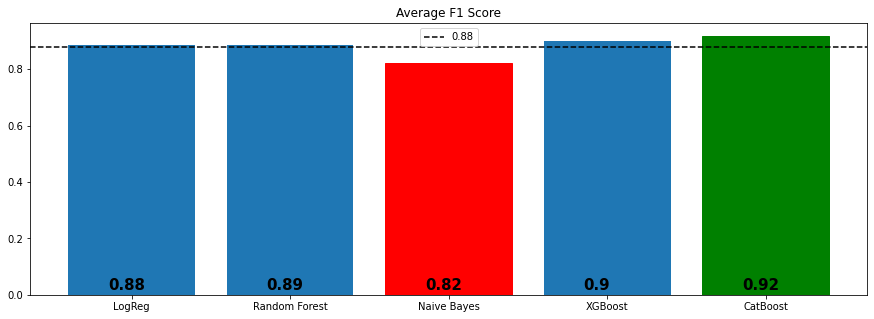

In [ ]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")

## 4.3 Hashing Vectorizer

Hash Vectorizer is designed to be as memory efficient as possible. Instead of storing the tokens as strings, the vectorizer applies the hashing trick to encode them as numerical indexes. The downside of this method is that once vectorized, the features’ names can no longer be retrieved.

In [ ]:
# Create the word vector with Hash Vectorizer
hash_vect = HashingVectorizer(n_features=2000, ngram_range=(1,1),alternate_sign=False)
hash_vect_train = hash_vect.fit_transform(X_train)
hash_vect_train = hash_vect_train.toarray()
hash_vect_test = hash_vect.transform(X_test)
hash_vect_test = hash_vect_test.toarray()

## 4.3.1 Logistic Regression with Hash Vectorizer

In [ ]:
# Call the modeling function for logistic regression with Hash Vectorizer and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42), 
                            hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_logreg = y_pred

f1 score: 0.8687862337060699


In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_hash_logreg))

              precision    recall  f1-score   support

           0       0.44      0.86      0.59       462
           1       0.98      0.85      0.91      3288

    accuracy                           0.85      3750
   macro avg       0.71      0.86      0.75      3750
weighted avg       0.91      0.85      0.87      3750



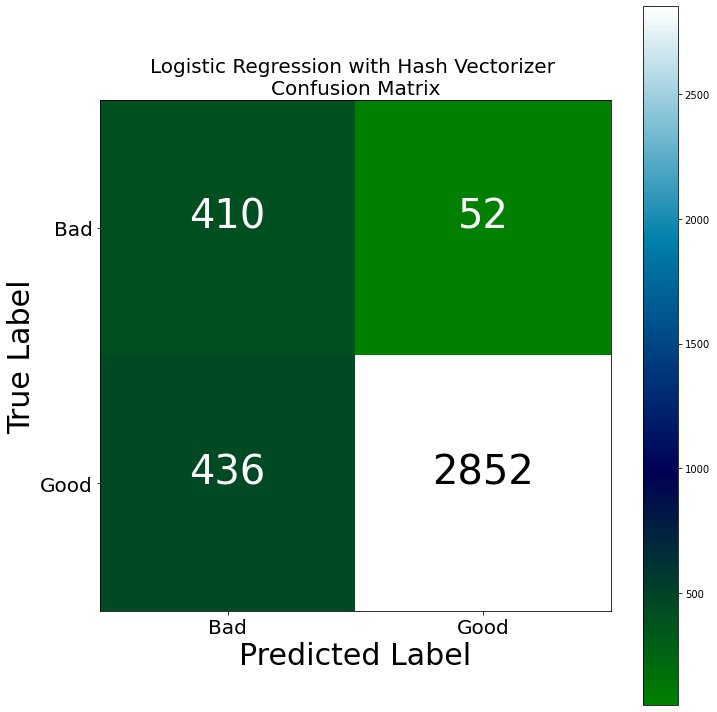

In [ ]:
# Print confusion matrix for logistic regression with Hash Vectorizer
disp_confusion_matrix(y_pred_tfidf_logreg, "Logistic Regression", "Hash Vectorizer")

## 4.3.2 Random Forest with Hash Vectorizer

In [ ]:
# Call the modeling function for random forest classifier with Hash Vectorizer and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_rf = y_pred

f1 score: 0.8825042556844661


In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_hash_rf))

              precision    recall  f1-score   support

           0       0.94      0.26      0.41       462
           1       0.91      1.00      0.95      3288

    accuracy                           0.91      3750
   macro avg       0.92      0.63      0.68      3750
weighted avg       0.91      0.91      0.88      3750



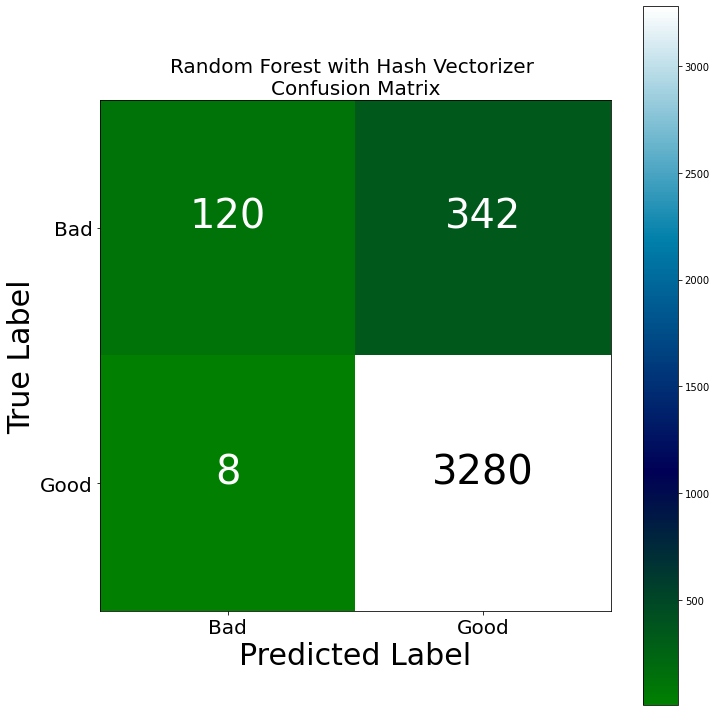

In [ ]:
# Print confusion matrix for random forest classifier with Hash Vectorizer
disp_confusion_matrix(y_pred_hash_rf, "Random Forest", "Hash Vectorizer")

## 4.3.3 Naive Bayes with Hash Vectorizer

In [ ]:
# Call the modeling function for naive bayes with Hash Vectorizer and print f1 score
modeling(MultinomialNB(), hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_nb = y_pred

f1 score: 0.8358429345832484


In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_hash_nb))

              precision    recall  f1-score   support

           0       0.96      0.06      0.11       462
           1       0.88      1.00      0.94      3288

    accuracy                           0.88      3750
   macro avg       0.92      0.53      0.52      3750
weighted avg       0.89      0.88      0.84      3750



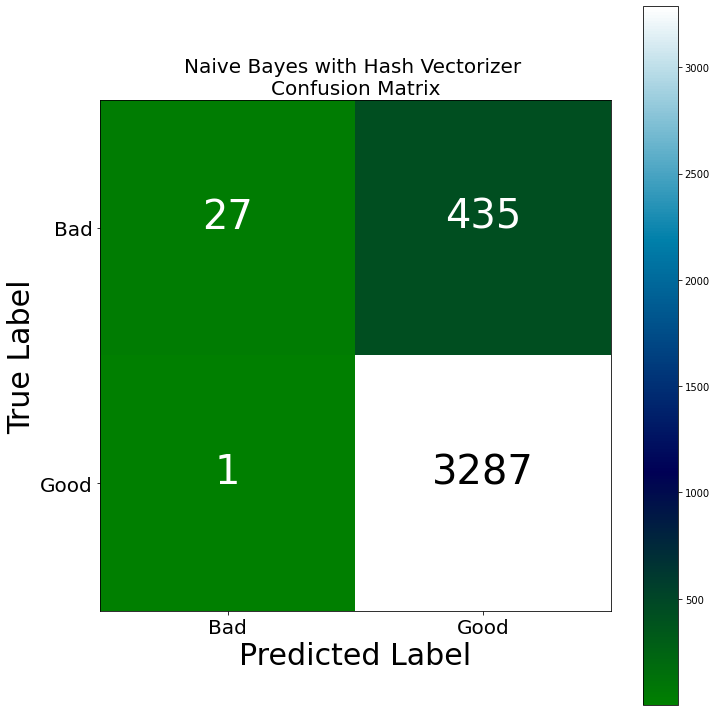

In [ ]:
# Print confusion matrix for naive bayes with Hash Vectorizer
disp_confusion_matrix(y_pred_hash_nb, "Naive Bayes", "Hash Vectorizer")

## 4.3.4 XGBoost with Hash Vectorize

In [ ]:
# Call the modeling function for XGBoost with Hash Vectorizer and print f1 score
modeling(XGBClassifier(), hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_xgb = y_pred

f1 score: 0.8956643908033091


In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_hash_xgb))

              precision    recall  f1-score   support

           0       0.90      0.34      0.49       462
           1       0.91      0.99      0.95      3288

    accuracy                           0.91      3750
   macro avg       0.91      0.67      0.72      3750
weighted avg       0.91      0.91      0.90      3750



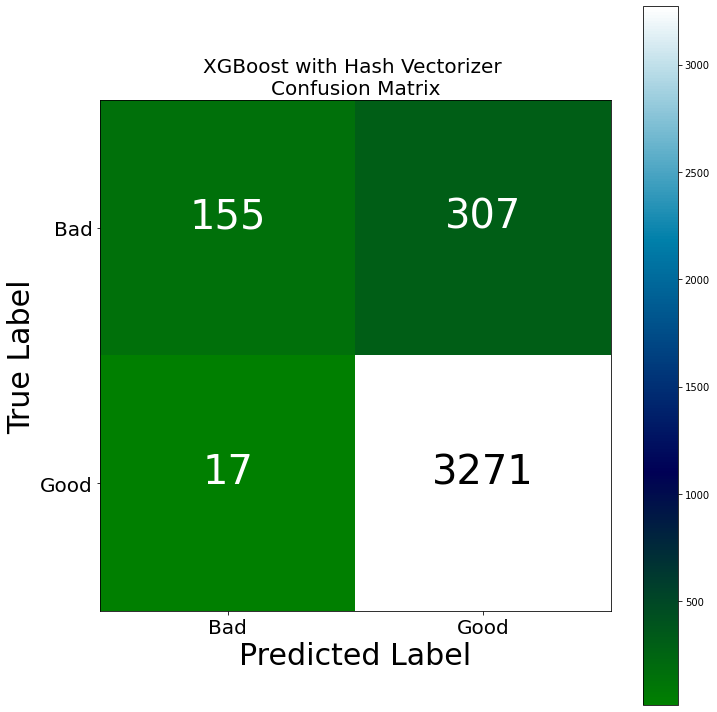

In [ ]:
# Print confusion matrix for XGBoost with Hash Vectorizer
disp_confusion_matrix(y_pred_hash_xgb, "XGBoost", "Hash Vectorizer")

## 4.3.5 CatBoost with Hash Vectorizer

In [ ]:
# Call the modeling function for Catboost with Hash Vectorizer and print f1 score
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, depth=2, 
                            loss_function='Logloss'), hash_vect_train, hash_vect_test)

# Assign y_pred to a variable for further process
y_pred_hash_catboost = y_pred

0:	learn: 0.3724584	total: 21.8ms	remaining: 2.16s
1:	learn: 0.3319047	total: 42.2ms	remaining: 2.07s
2:	learn: 0.3138253	total: 68.1ms	remaining: 2.2s
3:	learn: 0.3057903	total: 97ms	remaining: 2.33s
4:	learn: 0.2969707	total: 124ms	remaining: 2.35s
5:	learn: 0.2886000	total: 144ms	remaining: 2.25s
6:	learn: 0.2770037	total: 164ms	remaining: 2.17s
7:	learn: 0.2674122	total: 183ms	remaining: 2.11s
8:	learn: 0.2630875	total: 203ms	remaining: 2.05s
9:	learn: 0.2543507	total: 229ms	remaining: 2.06s
10:	learn: 0.2508245	total: 249ms	remaining: 2.02s
11:	learn: 0.2474091	total: 269ms	remaining: 1.97s
12:	learn: 0.2420438	total: 289ms	remaining: 1.93s
13:	learn: 0.2377366	total: 308ms	remaining: 1.89s
14:	learn: 0.2348386	total: 329ms	remaining: 1.86s
15:	learn: 0.2296476	total: 348ms	remaining: 1.83s
16:	learn: 0.2242388	total: 369ms	remaining: 1.8s
17:	learn: 0.2196115	total: 393ms	remaining: 1.79s
18:	learn: 0.2177347	total: 414ms	remaining: 1.76s
19:	learn: 0.2144728	total: 437ms	remaini

In [ ]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_hash_catboost))

              precision    recall  f1-score   support

           0       0.71      0.53      0.60       462
           1       0.94      0.97      0.95      3288

    accuracy                           0.91      3750
   macro avg       0.82      0.75      0.78      3750
weighted avg       0.91      0.91      0.91      3750



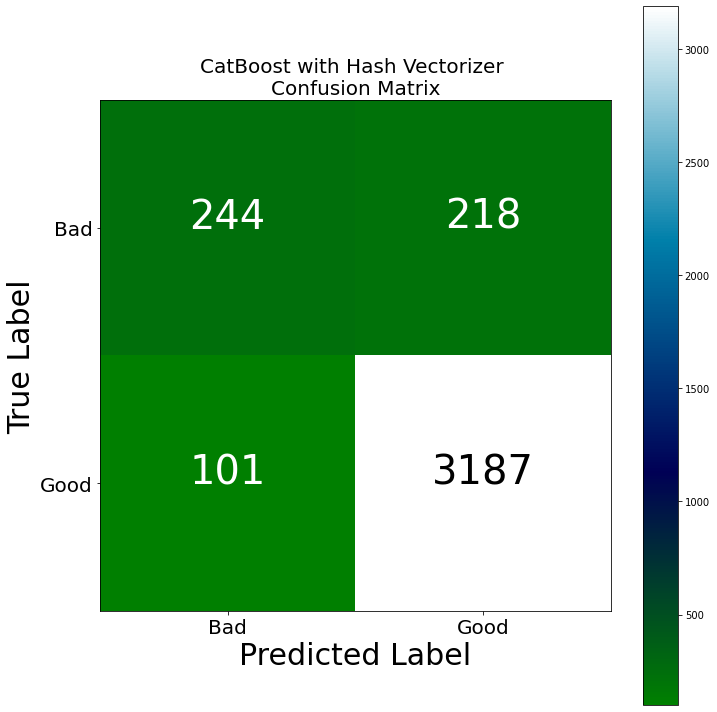

In [ ]:
# Print confusion matrix for CatBoost with Hash Vectorizer
disp_confusion_matrix(y_pred_hash_catboost, "CatBoost", "Hash Vectorizer")

## 4.3.6 Comparison of Models with Hash Vectorizer

In [ ]:
comparison_table(y_preds = [y_pred_hash_logreg, y_pred_hash_rf, y_pred_hash_nb, y_pred_hash_xgb, y_pred_hash_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

In [ ]:
# Print the comparision matrix
print('\nComparision Matrix of Models with Hash Vectorizer\n')
df_tv2


Comparision Matrix of Models with Hash Vectorizer



precision    recall  f1-score  \
vectorizer model         accuracy class                                    
CountVect  LogReg        0.850133 bad       0.444196  0.861472  0.586156   
                                  good      0.977575  0.848540  0.908499   
                                  average   0.911863  0.850133  0.868786   
           Random Forest 0.906667 bad       0.937500  0.259740  0.406780   
                                  good      0.905577  0.997567  0.949349   
                                  average   0.909510  0.906667  0.882504   
           Naive Bayes   0.883733 bad       0.964286  0.058442  0.110204   
                                  good      0.883127  0.999696  0.937803   
                                  average   0.893126  0.883733  0.835843   
           XGBoost       0.913600 bad       0.901163  0.335498  0.488959   
                                  good      0.914198  0.994830  0.952811   
                                  average   0.912592  0.913600  0.895664   
           CatBoost      0.914933 bad       0.707246  0.528139  0.604709   
                                  good      0.935977  0.969282  0.952338   
                                  average   0.907797  0.914933  0.909510   

                                           support  
vectorizer model         accuracy class             
CountVect  LogReg        0.850133 bad        462.0  
                                  good      3288.0  
                                  average   3750.0  
           Random Forest 0.906667 bad        462.0  
                                  good      3288.0  
                                  average   3750.0  
           Naive Bayes   0.883733 bad        462.0  
                                  good      3288.0  
                                  average   3750.0  
           XGBoost       0.913600 bad        462.0  
                                  good      3288.0  
                                  average   3750.0  
           CatBoost      0.914933 bad        462.0  
                                  good      3288.0  
                                  average   3750.0

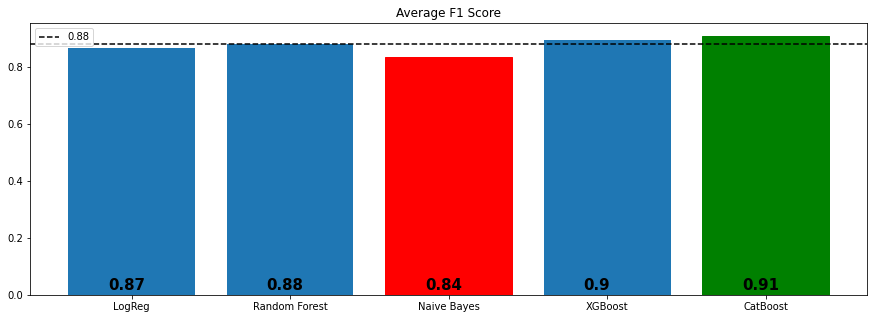

In [ ]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")